In [108]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.utils.data as data
# import tensorflow as tf
# from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Dense
from sklearn import preprocessing

from sklearn.model_selection import *
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
import seaborn as sns
from scipy import stats

## **Exploratory Data Analysis**

In [109]:
data = pickle.load(open(r'/content/deltaQ_cycles_v2.pkl', 'rb'))
data2 = pickle.load(open(r'/content/temp_features.pkl', 'rb'))

In [65]:
df = pd.DataFrame(data)
df = df.T
df

,cycle_life,DeltaQ_logVars,DeltaQ_mins,DeltaQ_means,DeltaTmax,DeltaT_logVars
b1c0,1852.0,"[-5.312397783990413, -6.083994961532522, -5.18...","[-0.008240395988927805, -0.0002242341749867683...","[0.0004857428370437458, 0.00125113988300626, 0...","[-0.012389999999996348, 0.035713000000001216, ...","[-1.9881162501132235, -2.7181121118223963, -2...."
b1c1,2160.0,"[-5.344830628831667, -5.439216236809741, -5.16...","[-0.00432735462716327, -0.004458660307576208, ...","[0.0003726826150039431, 0.0015934313381018713,...","[0.2889589999999984, 0.17678799999999484, 0.20...","[-1.6111407618998372, -2.281788262668073, -1.8..."
b1c2,2237.0,"[-5.489668172937059, -5.6467550579622, -5.2868...","[-0.004304080500288299, -0.0032179659895331227...","[0.0003293821672540132, 0.0014632261885215785,...","[0.30951999999999913, 0.18937299999999624, 0.2...","[-1.4958770510032218, -2.146562363786118, -1.6..."
b1c3,1434.0,"[-5.272649102763021, -5.427970306360354, -5.05...","[-0.0028570076337987565, -0.002114717791624455...","[0.0009878154531647756, 0.0015790925931035184,...","[-0.40435799999999844, -0.08317399999999964, -...","[-0.9266008864992038, -1.5966558182778428, -1...."
b1c4,1709.0,"[-5.6797028144354496, -5.563698811619805, -5.3...","[-0.0008590741949457948, -0.002204777920881737...","[0.0010893794834235966, 0.0016430508816848257,...","[-0.2077820000000017, -0.08847399999999794, -0...","[-1.724559802612215, -1.9553147086278513, -1.8..."
...,...,...,...,...,...,...
b3c39,1156.0,"[-5.105482962223203, -5.017338483061545, -5.02...","[-0.010894729536144607, -0.011787709566672987,...","[0.0004469222845277273, 0.0009143767316177368,...","[-0.08394276625630681, -0.11817576625630721, -...","[-2.446514149131019, -2.7335857239579773, -2.5..."
b3c40,796.0,"[-5.226655617269972, -5.511814547940238, -5.30...","[-0.004057331993564728, -0.002638208129922096,...","[0.0009176807162887679, 0.0016223933453947956,...","[-0.05785330548632572, -0.069861351497984, -0....","[-2.9900936979624775, -2.7669133351679474, -2...."
b3c41,786.0,"[-6.026736086410441, -5.113981992883326, -5.34...","[-0.001561025426189433, -0.001779113057880366,...","[0.0008297075912756135, 0.001980606967077966, ...","[-0.03301541631560667, -0.10398741631561137, -...","[-2.923841380490041, -2.3799555893179707, -2.7..."
b3c44,940.0,"[-5.675020915160977, -5.534075831837039, -5.45...","[-0.004161323073706958, -0.004370824511735538,...","[0.0005364604508535664, 0.001036508644240508, ...","[-0.041370577581894, -0.1062051569976461, -0.0...","[-2.835719963375267, -2.8405686889629194, -2.7..."


In [110]:
df.shape

(124, 6)

In [10]:
data['b1c0'].keys()

dict_keys(['cycle_life', 'DeltaQ_logVars', 'DeltaQ_mins', 'DeltaQ_means', 'DeltaTmax', 'DeltaT_logVars'])

In [14]:
y = np.zeros(124)

x = np.zeros((124, 2*97))
for i, cell in enumerate(data.keys()):
    x[i, :97] = data[cell]["DeltaQ_logVars"][1:]
    #x[i, 97:2*97] = np.log10(-data[cell]["DeltaQ_mins"][1:])
    #x[i, 97:2*97] = data[cell]["DeltaQ_means"][1:]
    #x[i, 97:2*97] = data[cell]["DeltaT_logVars"][1:]
    x[i, 97:2*97] = data[cell]["DeltaTmax"][1:]
    y[i] = np.log10(data[cell]["cycle_life"])

# convert to tensors and concatenate features and labels
x = torch.Tensor(x)
y = torch.Tensor(y)

In [18]:
x

tensor([[-6.0840, -5.1866, -5.6543,  ..., -0.3119, -0.2682, -0.3301],
        [-5.4392, -5.1624, -5.0338,  ..., -0.2808, -0.2674, -0.3582],
        [-5.6468, -5.2868, -5.0770,  ..., -0.2389, -0.2757, -0.2801],
        ...,
        [-5.1140, -5.3493, -5.0270,  ...,  0.5424,  0.4963,  0.6248],
        [-5.5341, -5.4544, -5.3185,  ...,  0.5943,  0.5508,  0.3901],
        [-6.0738, -5.0041, -4.8870,  ...,  0.3060,  0.2672,  0.0471]])

Correlation of Features

## **AutoEncoder: Dimensionality Reduction**

### **Train Test Split**

In [19]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])


In [92]:
plt.rcParams["figure.figsize"] = (18,7)

class AutoEncoder_ElasticNet(nn.Module):
    def __init__(self, n_features, n_cycles=49, alpha=0.5):
        super(AutoEncoder_ElasticNet, self).__init__()

        self.alpha = alpha
        self.n_features = n_features
        self.n_cycles = n_cycles

        self.encoder = nn.Sequential(
            nn.Linear(n_features*n_cycles, n_features*32),
            nn.ReLU(),
            nn.Linear(n_features*32, n_features*16),
            # nn.ReLU(),
            # nn.Linear(n_features*16, n_features*8),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            # nn.Linear(n_features*8, n_features*16),
            # nn.ReLU(),
            nn.Linear(n_features*16, n_features*32),
            nn.ReLU(),
            nn.Linear(n_features*32, n_features*n_cycles)
        )

        self.prediction = nn.Linear(n_features*16, 1)

    def elastic_net_loss(self):

        l1_norm = self.prediction.weight.abs().sum()
        l2_norm = self.prediction.weight.pow(2).sum()

        return (1-self.alpha)/2 * l2_norm + self.alpha * l1_norm

    def elastic_net_predict(self, x):
        return self.prediction(self.encoder(x))

    def forward(self, x):
        self.eval()
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def evaluate(self, x, y):
        mses = [0.0, 0.0, 0.0]
        for i in train_ind:
            mses[0] += (10**self.elastic_net_predict(x[i]).detach().numpy() - 10**y[i].detach().numpy())**2
        for i in test_ind:
            mses[1] += (10**self.elastic_net_predict(x[i]).detach().numpy() - 10**y[i].detach().numpy())**2
        for i in secondary_ind:
            mses[2] += (10**self.elastic_net_predict(x[i]).detach().numpy() - 10**y[i].detach().numpy())**2

        mses[0] = np.sqrt(mses[0] / len(train_ind))
        mses[1] = np.sqrt(mses[1] / len(test_ind))
        mses[2] = np.sqrt(mses[2] / len(secondary_ind))

        for mse, label in zip(mses, ["train", "test", "sec"]):
            print(label, "\t", mse[0])


    def plotter(self, x, y, id):
        fig, axs = plt.subplots(1, 2)
        for i in range(self.n_features):
            axs[0].plot(x[id].detach().numpy()[i*self.n_cycles:(i+1)*self.n_cycles],
                        self.forward(x[id]).detach().numpy()[i*self.n_cycles:(i+1)*self.n_cycles], ".", label = "feature {}".format(i+1))
        axs[0].plot(np.linspace(-5.5, 1.5, 3), np.linspace(-5.5, 1.5, 3), "k", alpha = 0.5)

        axs[0].legend()
        axs[0].set_xlabel("True input")
        axs[0].set_ylabel("Decoded input")
        axs[0].set_title("Decoder performance, cell "+str(id))

        axs[1].plot(y[train_ind], self.elastic_net_predict(x[train_ind]).detach().numpy(), ".", label = "train")
        axs[1].plot(y[test_ind], self.elastic_net_predict(x[test_ind]).detach().numpy(), ".", label = "test")
        axs[1].plot(y[secondary_ind], self.elastic_net_predict(x[secondary_ind]).detach().numpy(), ".", label = "secondary")
        axs[1].plot(np.linspace(2.15, 3.4, 3), np.linspace(2.15, 3.4, 3), "k", alpha = 0.5)

        axs[1].legend()
        axs[1].set_xlabel("True input")
        axs[1].set_ylabel("Decoded input")
        axs[1].set_title("Prediction performance")

        plt.show()

    def fit(self, x, y, train_policy, verbose = True, plots = True, log_loss = False):

        self.train()
        loss_function = nn.MSELoss()
        train_data = TensorDataset(torch.Tensor(x[train_ind]),torch.Tensor(y[train_ind]))

        num_stages = train_policy["num_stages"]
        for stage in range(num_stages):

            if verbose: print("\nStage {}:\n".format(stage+1))

            epochs = train_policy["epochs"][stage]
            lr = train_policy["learning_rates"][stage]
            batch_size = train_policy["batch_sizes"][stage]
            prediction_weight = train_policy["prediction_weights"][stage]
            decoding_weight = train_policy["decoding_weights"][stage]
            en_weight = train_policy["decoding_weights"][stage]

            train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
            optimiser = torch.optim.Adam(self.parameters(), lr=lr)

            for ep in range(epochs):
                for batch in train_loader:

                    train_inputs, train_labels = batch
                    outputs = self.forward(train_inputs)
                    predictions = self.elastic_net_predict(train_inputs)

                    if log_loss:
                        loss = loss_function(train_labels, predictions[:, 0])*prediction_weight
                    else:
                        loss = loss_function(10**train_labels, 10**predictions[:, 0])*prediction_weight
                    loss += self.elastic_net_loss()*en_weight + loss_function(train_inputs, outputs)*decoding_weight

                    optimiser.zero_grad()
                    loss.backward()
                    optimiser.step()

                if verbose:
                    if (ep+1) % int(epochs / 10) == 0: print(f"Epoch {ep+1}/{epochs}, loss: {loss.item():.2f}")

            if verbose: self.evaluate(x, y)
            if plots:
                self.plotter(x, y, 30)



Stage 1:

Epoch 300/3000, loss: 1880.93
Epoch 600/3000, loss: 1085.48
Epoch 900/3000, loss: 786.71
Epoch 1200/3000, loss: 611.60
Epoch 1500/3000, loss: 486.58
Epoch 1800/3000, loss: 395.33
Epoch 2100/3000, loss: 326.39
Epoch 2400/3000, loss: 272.95
Epoch 2700/3000, loss: 227.38
Epoch 3000/3000, loss: 186.42
train 	 41.631557
test 	 117.37088
sec 	 354.80835


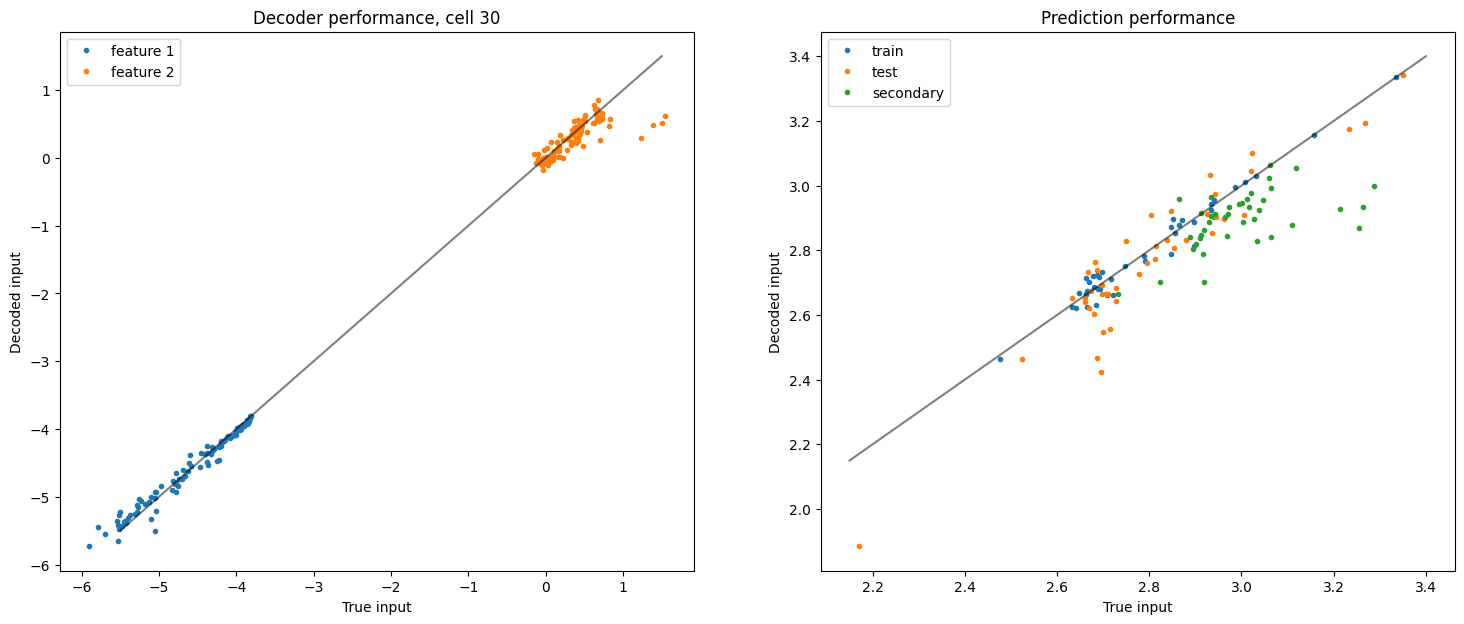


Stage 2:

Epoch 100/1000, loss: 1.44
Epoch 200/1000, loss: 1.41
Epoch 300/1000, loss: 1.39
Epoch 400/1000, loss: 1.36
Epoch 500/1000, loss: 1.34
Epoch 600/1000, loss: 1.31
Epoch 700/1000, loss: 1.29
Epoch 800/1000, loss: 1.27
Epoch 900/1000, loss: 1.25
Epoch 1000/1000, loss: 1.23
train 	 30.929907
test 	 118.0735
sec 	 335.62122


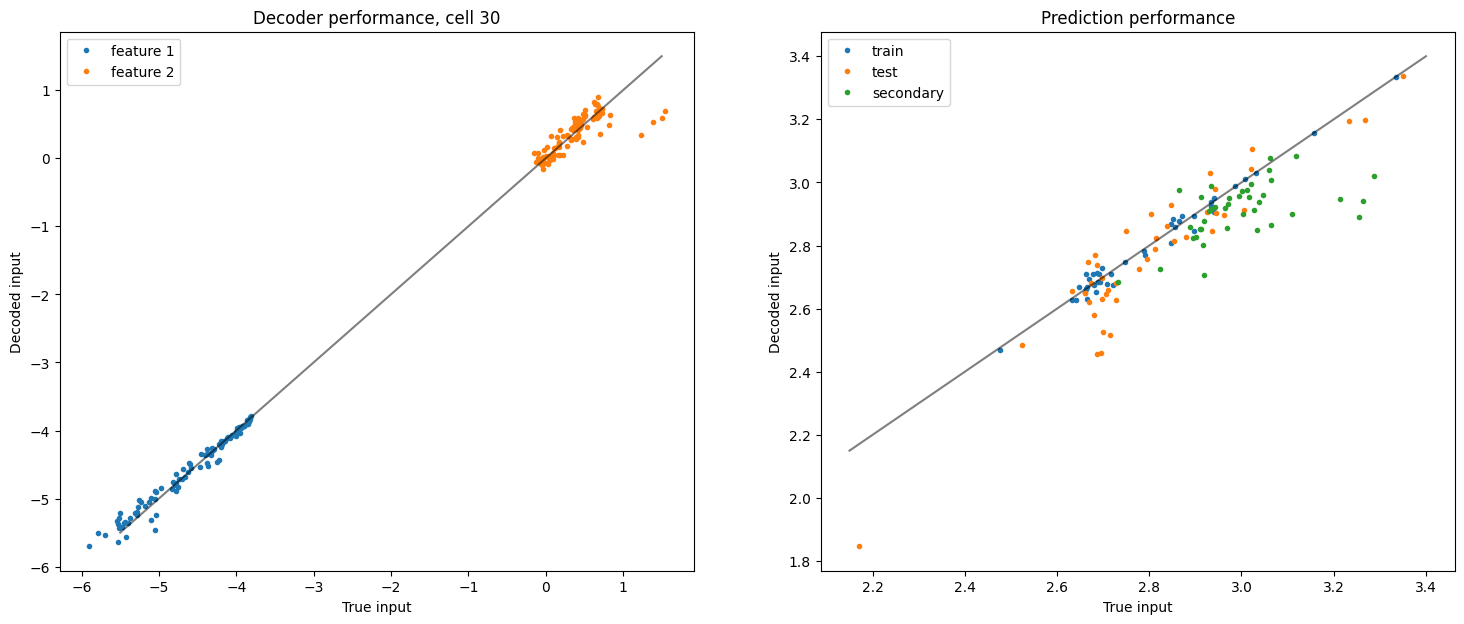

In [113]:
train_policy = {
    "num_stages": 2,
    "epochs": [3000, 1000],
    "learning_rates": [3e-5, 1e-5],
    "batch_sizes": [64, 64],
    "prediction_weights": [0.1, 0.0001],
    "decoding_weights": [10, 1],
    "en_weights": [1, 1]
}

model = AutoEncoder_ElasticNet(n_features=2, n_cycles=97)
train = TensorDataset(torch.Tensor(x[train_ind]),torch.Tensor(y[train_ind]))
model.fit(x,y,train_policy)

In [114]:
model.encoder(x[5])

tensor([2.2421, 3.4333, 3.3160, 0.0000, 0.0000, 0.0000, 2.6696, 0.6420, 0.0000,
        0.0000, 0.7666, 0.8180, 1.1249, 0.0000, 0.9111, 0.0000, 0.0000, 4.3404,
        0.3175, 4.4630, 0.0000, 0.0000, 0.0000, 0.3987, 0.0000, 2.2399, 0.0000,
        0.0000, 5.5984, 3.3639, 2.6583, 0.0000], grad_fn=<ReluBackward0>)

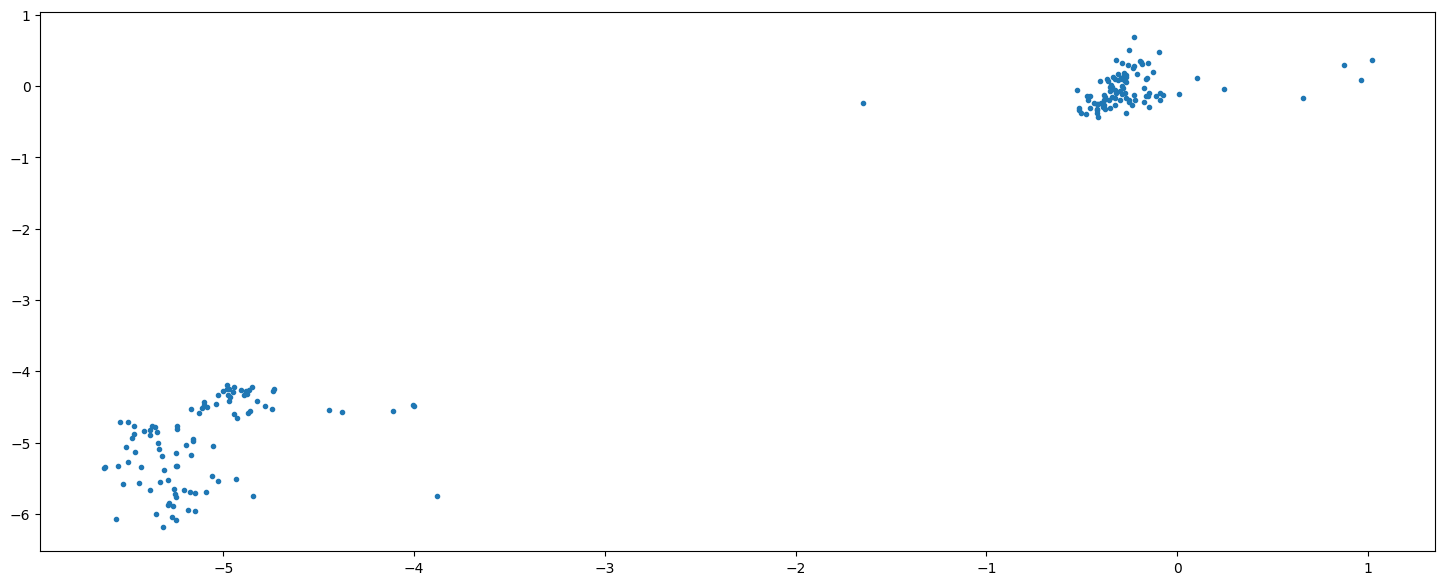

In [115]:
plt.plot(x[4].detach().numpy(), model.forward(x[4]).detach().numpy(), ".")

In [99]:
print(y[1], model.elastic_net_predict(x[1]))

tensor(3.3345) tensor([3.3339], grad_fn=<AddBackward0>)


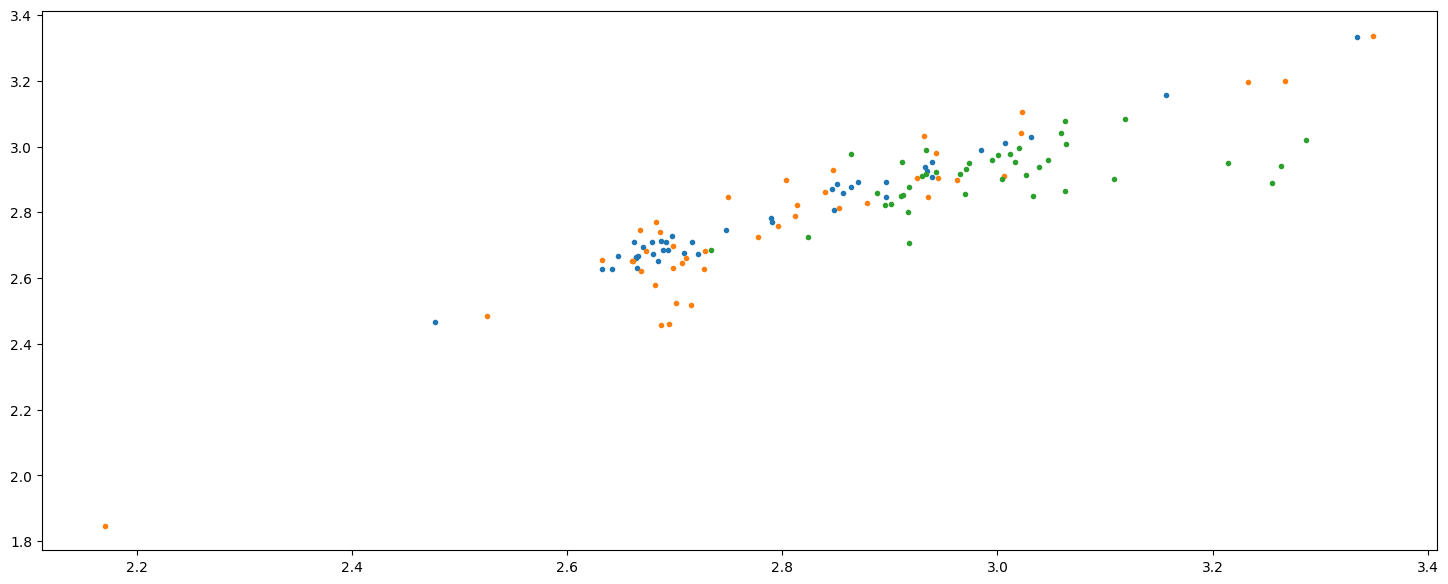

In [116]:
plt.plot(y[train_ind], model.elastic_net_predict(x[train_ind]).detach().numpy(), ".")
plt.plot(y[test_ind], model.elastic_net_predict(x[test_ind]).detach().numpy(), ".")
plt.plot(y[secondary_ind], model.elastic_net_predict(x[secondary_ind]).detach().numpy(), ".")

## **SVR**

In [117]:
x_t = model.encoder(x[train_ind]).detach().numpy()
x_te = model.encoder(x[test_ind]).detach().numpy()
x_ste = model.encoder(x[secondary_ind]).detach().numpy()

scaler = preprocessing.StandardScaler().fit(list(x_t))
x_t = scaler.transform(list(x_t))
x_te = scaler.transform(list(x_te))
x_ste = scaler.transform(list(x_ste))

In [102]:
x_t.shape

(41, 32)

In [125]:
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)
regressor = SVR()

param_grid = {'C': np.logspace(-5, 1, base=10, num=1000),
              'kernel': ['linear','rbf', 'sigmoid'],
              'gamma': np.logspace(-5, 0, base=10, num=50),  #changed from -5,1
              'epsilon': np.logspace(-5, 1, base=10, num=50)} #changed from #-5,1
print(y[train_ind])
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 20000, cv=folds, param_distributions = param_grid ,scoring=my_scorer, random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_t, y[train_ind].detach().numpy())

tensor([3.3345, 3.1565, 3.0310, 2.9395, 2.8965, 2.8567, 2.9330, 2.8965, 2.7474,
        3.0073, 2.9395, 2.9345, 2.8506, 2.8639, 2.8704, 2.8476, 2.7903, 2.9850,
        2.8463, 2.7896, 2.4771, 2.6415, 2.6474, 2.7084, 2.6785, 2.6839, 2.6937,
        2.6637, 2.6893, 2.7218, 2.6637, 2.6702, 2.6972, 2.6920, 2.7160, 2.6656,
        2.6794, 2.6618, 2.6325, 2.6646, 2.6875])
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=20000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19695570e-05,...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=20000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19695570e-05,...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00]),
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [142]:
regressor = SVR(kernel=model.best_params_['kernel'],epsilon=model.best_params_['epsilon'], gamma = model.best_params_['gamma'], C=model.best_params_['C'])
regressor.fit(x_t, y[train_ind].detach().numpy())

SVR(C=1.524695727017573, epsilon=0.00868511373751352, gamma=0.3906939937054621,
    kernel='linear')

In [145]:
# print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,reduced_train_tensor.detach().numpy())-
#                                                np.power(10,y[train_ind].detach().numpy()))**2) ))
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10, regressor.predict(x_t)) - np.power(10, y[train_ind].detach().numpy()))**2)))
print("RMSE on Test Data: ", np.sqrt(np.mean((np.power(10, regressor.predict(x_te)) - np.power(10, y[test_ind].detach().numpy()))**2)))
print("RMSE on Secondary Test Data: ", np.sqrt(np.mean((np.power(10, regressor.predict(x_ste)) - np.power(10, y[secondary_ind].detach().numpy()))**2)))

RMSE on Train Data:  28.782799694435056
RMSE on Test Data:  117.06233062197185
RMSE on Secondary Test Data:  318.2853314058105


In [146]:
y[train_ind].detach().numpy()

array([3.3344538, 3.1565492, 3.0310042, 2.9395192, 2.8965263, 2.8567288,
       2.9329808, 2.8965263, 2.7474117, 3.007321 , 2.9395192, 2.9344985,
       2.8506463, 2.8639174, 2.870404 , 2.8475726, 2.790285 , 2.9849772,
       2.846337 , 2.7895808, 2.4771214, 2.641474 , 2.647383 , 2.708421 ,
       2.6785183, 2.683947 , 2.693727 , 2.6637008, 2.689309 , 2.7218106,
       2.6637008, 2.670246 , 2.6972294, 2.691965 , 2.7160034, 2.665581 ,
       2.6794279, 2.6618128, 2.6324573, 2.6646419, 2.6875288],
      dtype=float32)

In [147]:
regressor.predict(x_t)

array([3.34367201, 3.15350278, 3.02231195, 2.94782756, 2.90545094,
       2.87406299, 2.9240251 , 2.88756722, 2.75567685, 3.00504682,
       2.88593143, 2.9103658 , 2.86255754, 2.90850747, 2.8888526 ,
       2.8246384 , 2.7673622 , 2.97661563, 2.85489734, 2.78317097,
       2.48633943, 2.63282072, 2.65613129, 2.70300812, 2.69769517,
       2.67536433, 2.68468328, 2.6554296 , 2.68049171, 2.68857691,
       2.65521274, 2.678951  , 2.7059214 , 2.72357132, 2.72394822,
       2.65663542, 2.68309086, 2.69627707, 2.64087444, 2.6525753 ,
       2.69608417])

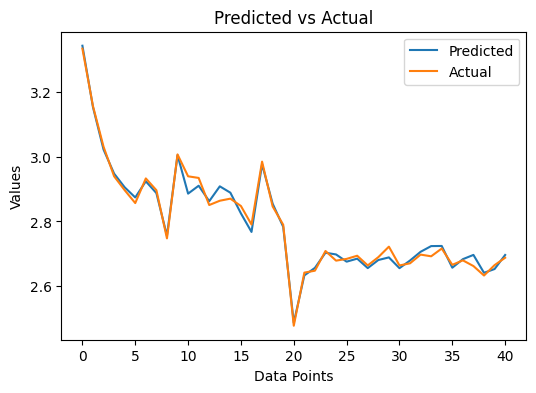

In [148]:
plt.figure(figsize=(6, 4))
plt.plot(regressor.predict(x_t), label='Predicted')
# Plotting the actual values
plt.plot(y[train_ind].detach().numpy(), label='Actual')

# Adding labels and title to the plot
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Predicted vs Actual')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

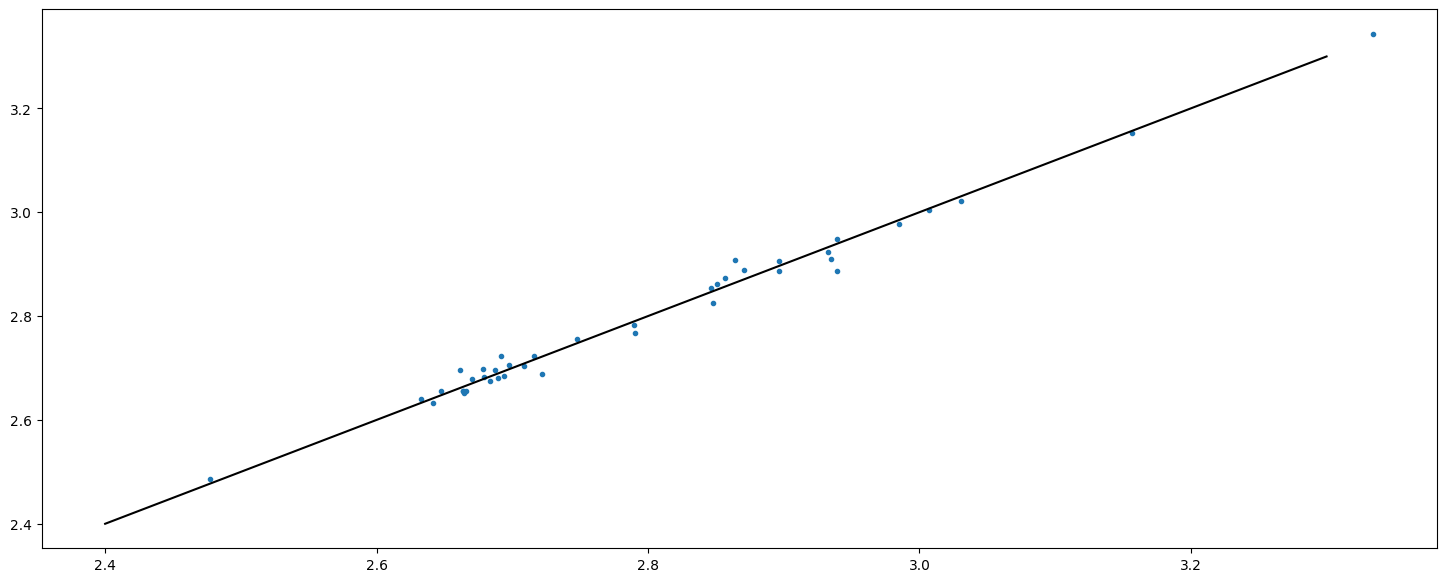

In [149]:
plt.plot(y[train_ind].detach().numpy(), regressor.predict(x_t), ".")
plt.plot(np.linspace(2.4, 3.3, 3), np.linspace(2.4, 3.3, 3), "k")